# 세워진 가설들을 확인해 보자

## feature 들을 조합하여 풀어 볼 질문들
+ 홈런을 치기 위한 평균 타구 스피드
+ 홈런을 치기 위한 발사각
+ 홈런이 많이 생산되는 구장
+ 타자의 평균 비거리와 홈런과의 상관관계
+ 당겨칠때와 밀어쳤을때의 홈런 생산량 차이
+ 타자가 몇번째 공을 친것인가?
+ 투수와 타자의 손이 반대일때 홈런이 더 많이 나오는가?
+ 같은 투수와의 시간 많아 질 수록 홈런 생산량이 늘어=나는가?
+ 파울이 아닌 외야로 공을 많이 보내는 타자는 홈런 확률이 더 늘어 나는가?
+ 구종/구속과의 홈런의 확률

In [146]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)

df_train = pd.read_csv('archive/train.csv')
df_test = pd.read_csv('archive/test.csv')
df_park = pd.read_csv('archive/park_dimensions.csv')

df_train.shape, df_test.shape

((46244, 25), (65779, 24))

In [147]:
## 원본 데이터 보존
train = df_train
test = df_test
park = df_park

### 위의 조합들은 모두 test 데이터와 train 데이터를 합쳐진 상태로 검증을 진행
### 발사 속도와 발사 각도는 결측치를 모두 제거한 상태로 진행

데이터 전처리

In [148]:
train[['plate_x', 'plate_z']] = train[['plate_x', 'plate_z']].apply(lambda x : x * 0.3048)
train[['pitch_mph', 'launch_speed']] = train[['pitch_mph', 'launch_speed']].apply(lambda x : x * 1.60934)

test[['plate_x', 'plate_z']] = test[['plate_x', 'plate_z']].apply(lambda x : x * 0.3048)
test[['pitch_mph', 'launch_speed']] = test[['pitch_mph', 'launch_speed']].apply(lambda x : x * 1.60934)

park[['LF_Dim', 'CF_Dim', 'RF_Dim', 'LF_W', 'CF_W', 'RF_W']] = park[['LF_Dim', 'CF_Dim', 'RF_Dim', 'LF_W', 'CF_W', 'RF_W']].apply(lambda x: x * 0.3048)

# 컬럼명 변경
train.rename(columns= {'pitch_mph' : 'pitch_kph'})
test.rename(columns= {'pitch_mph' : 'pitch_kph'})

bip_id            game_date home_team away_team batter_team  \
0          16  2021-06-23 00:00:00       MIA       TOR         MIA   
1          17  2021-06-23 00:00:00       MIA       TOR         MIA   
2          18  2021-06-01 00:00:00       TOR       MIA         MIA   
3          19  2021-06-01 00:00:00       TOR       MIA         MIA   
4          32  2021-06-13 00:00:00       BOS       TOR         BOS   
...       ...                  ...       ...       ...         ...   
65774  119513  2021-05-22 00:00:00       STL       CHC         CHC   
65775  119514  2021-05-22 00:00:00       STL       CHC         CHC   
65776  119515  2021-05-22 00:00:00       STL       CHC         CHC   
65777  119521  2021-05-14 00:00:00       ARI       WSH         WSH   
65778  119522  2021-06-04 00:00:00        KC       MIN          KC   

              batter_name         pitcher_name  batter_id  pitcher_id  \
0         marte, starling          ray, robbie     516782      592662   
1         marte, starling          ray, robbie     516782      592662   
2         marte, starling          ray, robbie     516782      592662   
3         marte, starling          ray, robbie     516782      592662   
4      hernandez, enrique          ray, robbie     571771      592662   
...                   ...                  ...        ...         ...   
65774      rizzo, anthony       mikolas, miles     519203      571945   
65775       hoerner, nico       mikolas, miles     663538      571945   
65776       hoerner, nico       mikolas, miles     663538      571945   
65777       mercer, jordy       peralta, david     474568      444482   
65778   gutierrez, kelvin  astudillo, willians     642721      553902   

       is_batter_lefty  is_pitcher_lefty      bb_type bearing pitch_name  \
0                    0                 1     fly_ball  center     Slider   
1                    0                 1  ground_ball  center     Slider   
2                    0                 1     fly_ball    left     Slider   
3                    0                 1  ground_ball    left     Slider   
4                    0                 1   line_drive  center     Slider   
...                ...               ...          ...     ...        ...   
65774                1                 0  ground_ball    left     Sinker   
65775                0                 0        popup   right     Slider   
65776                0                 0  ground_ball  center     Sinker   
65777                0                 1   line_drive  center   Fastball   
65778                0                 0        popup   right   Fastball   

       park  inning  outs_when_up  balls  strikes   plate_x   plate_z  \
0        14       6             0      2        1 -0.027432  0.640080   
1        14       1             1      1        2  0.204216  0.521208   
2        28       5             2      0        0 -0.152400  0.795528   
3        28       3             2      2        1 -0.137160  0.542544   
4         3       5             2      0        0  0.079248  0.697992   
...     ...     ...           ...    ...      ...       ...       ...   
65774    25       1             1      0        2 -0.091440  1.060704   
65775    25       4             2      3        2  0.423672  0.493776   
65776    25       2             1      0        2 -0.070104  0.893064   
65777     0       9             1      0        2 -0.188976  0.914400   
65778    11       8             0      1        2 -0.097536  0.752856   

        pitch_kph  launch_speed  launch_angle  
0      140.978184    175.418060          22.0  
1      142.265656     41.038170           NaN  
2      143.392194    151.599828           NaN  
3      145.484336    133.736154           NaN  
4      145.001534    173.969654           NaN  
...           ...           ...           ...  
65774  146.128072           NaN         -23.0  
65775  136.150164     88.191832          47.0  
65776  146.610874    128.103464           NaN  
65777  115.550612  

In [149]:
## 결측치 모두 제거
train_rmv = train.dropna()
test_rmv = test.dropna()

train_rmv.shape, test_rmv.shape

((25862, 25), (37010, 24))

In [150]:
## 결측치를 제거한 train 과 test를 합침
dfTotal_rnv = pd.concat([train_rmv, test_rmv])

In [151]:
dfTotal_rnv.shape

(62872, 25)

In [152]:
dfTotal_rnv['is_home_run'].value_counts()

0.0    24545
1.0     1317
Name: is_home_run, dtype: int64

In [153]:
print('홈런 비율', (1317 / 62872) * 100, '%')

홈런 비율 2.094732154218094 %


### 타구 스피드와 발사 각도에 대한 홈런 분석

In [154]:
dfTotal_rnv['launch_speed'].mean()
# 평균타구 스피드 : 142.17567712279035

142.17567712279035

In [155]:
df_homerun = dfTotal_rnv[dfTotal_rnv['is_home_run'] == 1]
print('홈런의 평균 발사 속도 : ', df_homerun['launch_speed'].mean())
print('홈런의 평균 발사 각도 : ', df_homerun['launch_angle'].mean())


홈런의 평균 발사 속도 :  167.10826895823863
홈런의 평균 발사 각도 :  28.914958238420652


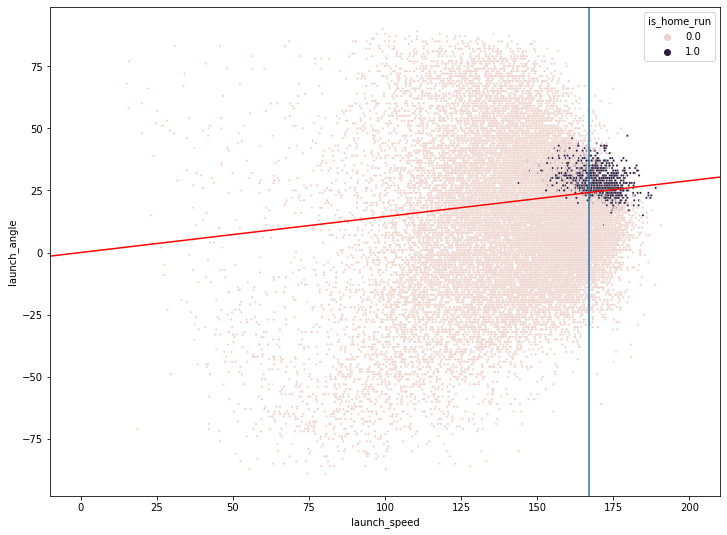

In [175]:
## 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 적용
plt.rc('font', family='NanumBarunGothic') 
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)

sns.scatterplot(data= dfTotal_rnv, x= 'launch_speed', y= 'launch_angle', hue = 'is_home_run', s=5)
plt.axvline(df_homerun['launch_speed'].mean())
plt.axline([0,0], [200.0, df_homerun['launch_angle'].mean()], color='red')

홈런 평균 발사 각도와 홈런 평균 발사 속도를 넘으면 대부분 홈런이다.

## 홈런이 더 많이 생산되는 구장이 있는가?

In [157]:
dfTotal = pd.concat([train, test])

# bb_type 결측치 행 제거
dfTotal.dropna(subset=['bb_type'], inplace=True)

## 구장별 총 히트수
dfTotal_hit = pd.DataFrame( dfTotal['park'].value_counts())
dfTotal_hit = dfTotal_hit.reset_index()
dfTotal_hit.columns=['park', 'total_hit']


In [158]:
## 구장별 홈런수
dfTotal_homerun = pd.DataFrame(dfTotal['is_home_run'].groupby(dfTotal['park']).sum())
dfTotal_homerun = dfTotal_homerun.reset_index()

In [159]:
## 두 데이터 프레임을 구장을 기준으로 합친다.
dfTotal_hit = pd.merge(dfTotal_hit, dfTotal_homerun , on= 'park')
dfTotal_hit['ratio_homerun'] = dfTotal_hit['is_home_run'] / dfTotal_hit['total_hit']
dfTotal_hit['ratio_homerun'] = dfTotal_hit['ratio_homerun'] * 100

In [160]:
dfTotal_hit = dfTotal_hit.sort_values(by='ratio_homerun', ascending=False)

홈런의 비율이 약 2배 정도 차이가 나는것을 알 수 있다.  
park의 정보가 고차원 이므로 **PCA**를 진행

In [161]:
parkData = park[['LF_Dim', 'CF_Dim', 'RF_Dim', 'LF_W', 'CF_W', 'RF_W']]
parkData = parkData.transpose()

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pipe_1 = make_pipeline(
    # StandardScaler(),
    PCA(1)
)

pipe_1.fit(parkData)

Pipeline(steps=[('pca', PCA(n_components=1))])

In [162]:
pipe_1[0].components_[[0]]

array([[0.18202104, 0.18197402, 0.17978078, 0.16929596, 0.18685036,
        0.18214841, 0.17949561, 0.18957932, 0.1837256 , 0.19004082,
        0.17988617, 0.18521215, 0.18402782, 0.18437376, 0.1856476 ,
        0.187651  , 0.1823522 , 0.18439624, 0.180606  , 0.18299   ,
        0.18202674, 0.17829886, 0.18235058, 0.18277439, 0.17810075,
        0.1846295 , 0.17923029, 0.18151538, 0.18135449, 0.18368755]])

In [163]:
## park 번호수으로 다시 정렬
dfTotal_hit.sort_values(by='park')

park  total_hit  is_home_run  ratio_homerun
7      0       3949         73.0       1.848569
1      1       4159        104.0       2.500601
24     2       3517         77.0       2.189366
0      3       4179         89.0       2.129696
21     4       3552         67.0       1.886261
22     5       3533        107.0       3.028588
19     6       3557         68.0       1.911723
5      7       4076         78.0       1.913641
18     8       3575         91.0       2.545455
23     9       3518         65.0       1.847641
2     10       4157         81.0       1.948521
6     11       3966         67.0       1.689360
12    12       3745         96.0       2.563418
3     13       4143        126.0       3.041274
20    14       3552         61.0       1.717342
27    15       3448         76.0       2.204176
9     16       3883         69.0       1.776977
29    17       3316         93.0       2.804584
10    18       3822        113.0       2.956567
4     19       4123         72.0       1.746301
17    20       3578         92.0       2.571269
16    21       3632         64.0       1.762115
11    22       3755         98.0       2.609854
25    23       3511         71.0       2.022216
28    24       3357         76.0       2.263926
26    25       3493         61.0       1.746350
8     26       3914        108.0       2.759325
14    27       3662         64.0       1.747679
13    28       3689         71.0       1.924641
15    29       3654         69.0       1.888342

In [164]:
for i in range (0 , 30):
    dfTotal_hit.loc[[i],['pca_parkData']] = pipe_1[0].components_[[0],[i]]
    

In [165]:
dfTotal_hit = dfTotal_hit.sort_values(by='ratio_homerun', ascending=False)

### 구장과 홈런 비율과의 관계 시각화

<AxesSubplot:label='88b73edd-22c9-490d-9131-8b504da9217c'>

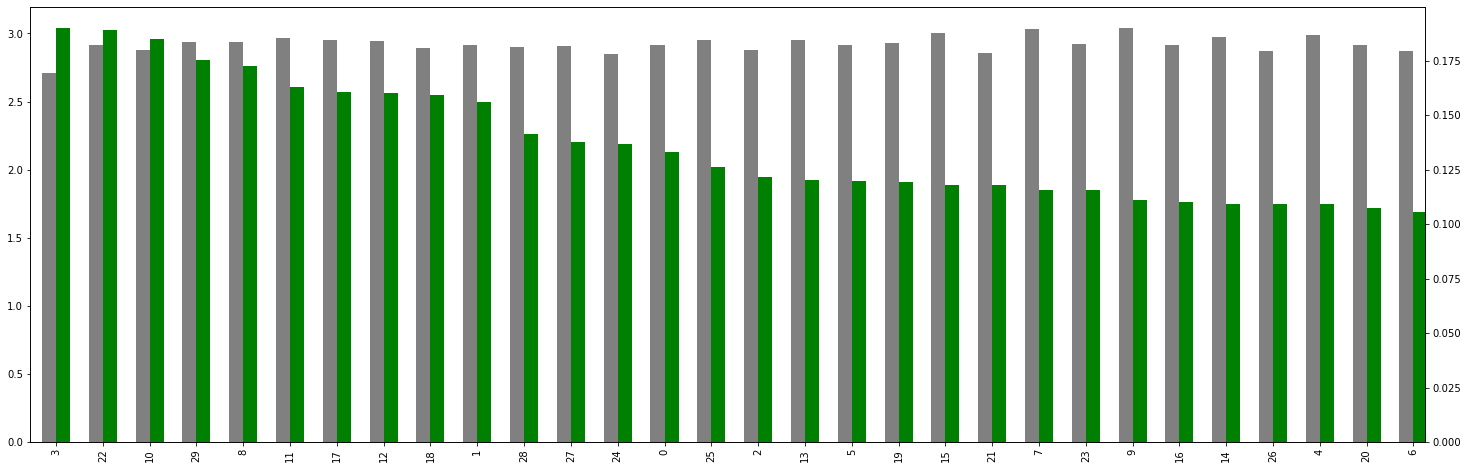

In [166]:
fig = plt.figure(figsize=(25, 8))

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
width = .3

dfTotal_hit.ratio_homerun.plot(kind ='bar', color='green', ax= ax1, width=width, position = 0)
dfTotal_hit.pca_parkData.plot(kind ='bar', color='gray', ax= ax2, width=width, position = 1)


구장 사이즈 pca 수치와 홈런 확률과의 관계는 크게 상관있어 보이지는 않는다.  
다만 1위 구장의 구장 사이즈 pca 수치가 유독 낮은건 눈에 띈다.  
확실히 하기 위해 상관계수를 구해 본다.

In [167]:
np.corrcoef(dfTotal_hit['ratio_homerun'],dfTotal_hit['pca_parkData'])[0,1]

-0.3367774051382154

### 상관계수가 음수값이 나온다 크게 상관은 없다고 볼 수 있다.

## 타구의 유형 (bb_type)과 홈런과의 관계

In [168]:
## bb_type의 유형 분석
dfTotal['bb_type'].value_counts()
df_bbType = pd.DataFrame(dfTotal['bb_type'].value_counts()).reset_index()
df_bbType.columns=['bb_type', 'total']
df_bbType

bb_type  total
0  ground_ball  48902
1   line_drive  28666
2     fly_ball  26584
3        popup   7863

In [169]:
dfT_bbType = pd.DataFrame(dfTotal['is_home_run'].groupby(dfTotal['bb_type']).sum()).reset_index()
dfT_bbType.columns=['bb_type', 'sum_homerun']
dfT_bbType

bb_type  sum_homerun
0     fly_ball       1345.0
1  ground_ball          0.0
2   line_drive       1102.0
3        popup          0.0

In [170]:
## 자료를 merge 해준다
dfT_bbType = pd.merge(dfT_bbType, df_bbType, on='bb_type')
dfT_bbType['ratio_homerun'] = dfT_bbType['sum_homerun'] / dfT_bbType['total'] * 100
dfT_bbType

bb_type  sum_homerun  total  ratio_homerun
0     fly_ball       1345.0  26584       5.059434
1  ground_ball          0.0  48902       0.000000
2   line_drive       1102.0  28666       3.844275
3        popup          0.0   7863       0.000000

+ 플라이볼과 라인 드라이브 타구에서 홈런이 나오는 것을 볼 수 있다.

## PermutationImportance에서 순위가 많이 오른 bearing (타구 방향)에 대해서 알아보자

In [171]:
bearing = pd.DataFrame(dfTotal['bearing'].value_counts()).reset_index()
bearing.columns = ['bearing', 'total']
bearing

bearing  total
0  center  46556
1    left  41762
2   right  23697

In [172]:
df_bearing = pd.DataFrame(dfTotal['is_home_run'].groupby(dfTotal['bearing']).sum()).reset_index()
df_bearing.columns =['bearing', 'sum_homerun']
df_bearing

bearing  sum_homerun
0  center       1520.0
1    left        487.0
2   right        440.0

In [173]:
## bearing 카운트와 merghe 해 준다.
df_bearing = pd.merge(df_bearing, bearing, on='bearing')
df_bearing['ratio_homerun'] = df_bearing['sum_homerun'] / df_bearing['total'] * 100
df_bearing

bearing  sum_homerun  total  ratio_homerun
0  center       1520.0  46556       3.264885
1    left        487.0  41762       1.166132
2   right        440.0  23697       1.856775

**센터를 향하는 타구의 홈런이 3배 가까이 많은 걸 알 수 있다.**

In [177]:
dfTotal['is_batter_lefty'].value_counts()

0    65925
1    46090
Name: is_batter_lefty, dtype: int64

또한 좌타자가 상대적으로 적기 때문에 우타자의 당겨치는 스윙이 많아  
타구의 방향이 우측보다 좌측으로 많이 쏠리는 것으로 추측 할 수 있다.

In [179]:
dfTotal

bip_id            game_date home_team away_team batter_team  \
0           1           2020-08-26       ARI       COL         COL   
1           2           2020-08-10       COL       ARI         COL   
2           3           2020-08-10       COL       ARI         COL   
3           4           2020-08-26       ARI       COL         COL   
4           5           2020-08-10       COL       ARI         COL   
...       ...                  ...       ...       ...         ...   
65774  119513  2021-05-22 00:00:00       STL       CHC         CHC   
65775  119514  2021-05-22 00:00:00       STL       CHC         CHC   
65776  119515  2021-05-22 00:00:00       STL       CHC         CHC   
65777  119521  2021-05-14 00:00:00       ARI       WSH         WSH   
65778  119522  2021-06-04 00:00:00        KC       MIN          KC   

             batter_name         pitcher_name  batter_id  pitcher_id  \
0         arenado, nolan          ray, robbie     571448      592662   
1         arenado, nolan          ray, robbie     571448      592662   
2         arenado, nolan          ray, robbie     571448      592662   
3      blackmon, charlie          ray, robbie     453568      592662   
4      blackmon, charlie          ray, robbie     453568      592662   
...                  ...                  ...        ...         ...   
65774     rizzo, anthony       mikolas, miles     519203      571945   
65775      hoerner, nico       mikolas, miles     663538      571945   
65776      hoerner, nico       mikolas, miles     663538      571945   
65777      mercer, jordy       peralta, david     474568      444482   
65778  gutierrez, kelvin  astudillo, willians     642721      553902   

       is_batter_lefty  is_pitcher_lefty      bb_type bearing  \
0                    0                 1   line_drive    left   
1                    0                 1   line_drive    left   
2                    0                 1        popup    left   
3                    1                 1     fly_ball   right   
4                    1                 1  ground_ball    left   
...                ...               ...          ...     ...   
65774                1                 0  ground_ball    left   
65775                0                 0        popup   right   
65776                0                 0  ground_ball  center   
65777                0                 1   line_drive  center   
65778                0                 0        popup   right   

            pitch_name  park  inning  outs_when_up  balls  strikes   plate_x  \
0               Slider     0       1             0      1        2 -0.045720   
1      4-Seam Fastball     7       1             1      3        1 -0.216408   
2               Slider     7       3             0      1        2 -0.164592   
3               Slider     0       1             0      0        2 -0.128016   
4      4-Seam Fastball     7       1             1      1        0  0.054864   
...                ...   ...     ...           ...    ...      ...       ...   
65774           Sinker    25       1             1      0        2 -0.091440   
65775           Slider    25       4             2      3        2  0.423672   
65776           Sinker    25       2             1      0        2 -0.070104   
65777         Fastball     0       9             1      0        2 -0.188976   
65778         Fastball    11       8             0      1        2 -0.097536   

        plate_z   pitch_mph  launch_speed  launch_angle  is_home_run  
0      0.600456  141.300052    175.257126           9.0          0.0  
1      0.877824  153.209168           NaN          18.0          0.0  
2      0.533400  139.207910    120.700500          49.0          0.0  
3      0.960120  139.529778    145.806204          54.0          0.0  
4      0.996696  154.657574           NaN           6.0          0.0  
...         ...         ...           ...           ...          ...  
65774  1.060704  146.128072           NaN         -23.0       